<a href="https://colab.research.google.com/github/Rocio206/ADA-Informes/blob/main/Informe_2_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento
A lo largo de las decadas se han desarrollado distintas tecnicas para diseñar algoritmos. En esta ocasion veremos un tipo de diseño llamado **divide y vecerás**.
El paradigma divide y vencerás consiste en:


1.   **Division** del problema en varios subproblemas, similares al problema original pero mas pequeños.
2.   **Resolver** los subproblemas de manera **recursiva**, es decir, aplicando el mis algoritmo sobre cada uno de ellos.
3.   **Convinar** las soluciones de los subproblemas para asi encontrar la solucion de problema original.


#2. MergeSort
El algoritmo de ordenamiento MergeSort es un algoritmo recurrente del tipo divide y venceras. Esto quiere decir que trabaja dividiedo el problema en 2 subconjuntos, simplificando el problema hasta que puede ser resuelto directamente, para luego a volver a unirlos de manera ordenada, dando solucion al problema orignal.

### 2.1 **¿Como funciona MergeSort?**

**Entrada:** Secuencia de n números $[a_1,a_2,...,a_n]$ 

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

MergeSort puede ser dividido en 2 partes, division (MergeSort) y convinacion (merge).

1.   Primero que nada, nos aseguramos de que el arreglo contenga por lo menos 2 elementos, de lo contrario retornamos, pues ya estaria ordenado.
2. Calculamos la mitad del arreglo ($arr$) y dividimos en dos sub-arreglos de $n/2$ cada uno. Para ordenadenar los sub-arreglos usamos MergeSort de manera recursiva para seguir dividiendo los arreglos hasta llegar a arreglos de un elemento.

![image](https://imgur.com/ppRPkQB.png)

3. Durante cada llamada a MergeSort se combinan dos de los sub-arreglos ordenados partiendo desde la parte inferior. Para cada secuencia se comparan los elementos en orden de izquieda a derecha y se van colocando ordenados un tercer arreglo.


![image](https://imgur.com/1lhiPyZ.png)
 
 ### 2.2  **¿Como funciona Merge?**
**Entrada:** Dos secuencias de ordenadas, una de $n$ números y la segunda de $n$ o $n-1$ números.  $[a_1,a_2,...,a_n]$ y  $[b_1,b_2,...,b_n]$.

**Salida:** Combinación ordenada de las dos secuencias de entrada  $[c_1,c_2,...,c_n]$, de tal manera que $c_1'\leq c_2' \leq... \leq c'n+n $.

La funcion Merge se encarga de combinar dos arreglos ordenados, generando un solo arreglo ordenado. El metodo consiste en los siguiente:


1.   Creamos un nuevo arreglo $c$ para colocar los elementos ordenados.
2.   Comparamos el primer elemento de cada sub-arreglo ($a[0], b[0]$) y agregamos el menor al final del arreglo $c$. Eliminamos el elemento del sub-arreglo original y repetimos hasta alguno de los sub-arreglos quede vacío.
3.   Copiamos el contenido del sub-arreglo restante directamente al final de $c$.


#3. Implementación

###3.1 Función Merge
El siguiente código muestra una implementación de la función **Merge**.

In [ ]:
def merge(a, b):
  c = []
  t = 0 #contador de comparaciones 
  while len(a) > 0 and len(b) > 0:
    if a[0] < b[0]:
      c.append (a[0])
      a.pop(0)
    else: 
      c.append (b[0])
      b.pop(0)
    t += 1
      
  if len(a) == 0:   #Se copian el contenido del sub-arreglo restante directamente en c
      c += b
  else:
      c += a
  
  return c , t
  

###3.2 Función MergeSort **(verbose=True)**
En el siguiente codigo se implementa el algoritmo MergeSort junto con la función **verbose** que permite ver lo que sucede con el arreglo, recurción a recurción.

In [6]:
def merge(a, b , t, r ):
  c = []
 #contador de comparaciones 
  while len(a) > 0 and len(b) > 0:
    t += 1
    if a[0] < b[0]:
      c.append (a[0])
      a.pop(0)
    else: 
      c.append (b[0])
      b.pop(0)
      
  if len(a) == 0:
      c += b
  else:
      c += a
  return c , t , r

def mergeSort(arr, r, verbose=True):
  r+=1  

  if verbose==True and r > 1 : 
    print()
    print("Recursion #", r-1 )
    print(arr)
    
  if len(arr) < 2: return arr , 0, r #comprobamos que el arreglo tenga por lo menos 2 elementos
  else:
    mid = len(arr) // 2
    right , t1, r= mergeSort(arr[:mid] , r)

    if verbose ==True and t1>0 :
      print(right)

    left , t2 , r= mergeSort(arr[mid:] , r)

    if verbose ==True and t2>0:
       print(left)
    print("Se ordenan:", right,"y",left)

    return merge(right, left, t1+t2, r)
  
## Ejemplo
A = [8,7,6,5,4,3]
print("Entrada :" ,A)
A , t, r = mergeSort(A, 0) 
print()
print("Salida :",A)
print("# Comparaciones:" ,t )
print("# Recurciones: ", r-1)


Entrada : [8, 7, 6, 5, 4, 3]

Recursion # 1
[8, 7, 6]

Recursion # 2
[8]

Recursion # 3
[7, 6]

Recursion # 4
[7]

Recursion # 5
[6]
Se ordenan: [7] y [6]
[6, 7]
Se ordenan: [8] y [6, 7]
[6, 7, 8]

Recursion # 6
[5, 4, 3]

Recursion # 7
[5]

Recursion # 8
[4, 3]

Recursion # 9
[4]

Recursion # 10
[3]
Se ordenan: [4] y [3]
[3, 4]
Se ordenan: [5] y [3, 4]
[3, 4, 5]
Se ordenan: [6, 7, 8] y [3, 4, 5]

Salida : [3, 4, 5, 6, 7, 8]
# Comparaciones: 9
# Recurciones:  10


#4. Correctitud 

##4.1 Funcion Merge

####**Teorema (correctitud)**
La funcion **Merge** genera un solo arreglo: $[c_1',c_2',...,c_n']$, con el contenido de los sub-arreglos de entrada ordenadados de menor a mayor, es decir,$c_1'\leq c_2' \leq... \leq c_n'$.
####Prueba del teorema 
Como se pudo observar en el ejemplo previo en cada iteración del bucle de la funcion Merge se compara el primer elemento del sub-arreglo $a[0]$ con el primer elemento del sub-arreglo $b[0]$ (ambos arreglos ordenados), se agregar el menor al final de arreglo $c$ y por ultimo, se elimina el elemento su arreglo original. Cuando uno de los arreglos queda vacio, c se concatena con el sub-arreglo restante.

Por lo que probaremos la siguiente **propiedad invariante de bucle** para la funcion Merge:

> Al comienzo de cada iteración $i$, el arreglo $c$ esta ordenado y el ultimo elemento de $c$ es menor que los primeros elementos de $a$ y $b$, es decir, $a[0] > c[-1]$ , $b[0] > c[-1]$. 

**Inicializacion**

En la primera iteracion ($i=1$), a $c$ aun no contiene ningun elemento por lo que se cumple trivialmente la propiedad.

**Mantencion**

Como en cada iteración se agrega el menor elemento entre $a[0]$ y $b[0]$ al final de c y se elimina del sub-arreglo correspondiente. Es muy obvio que al comienzo de la iteracion ($i=m$) se mantiene la propiedad.

**Correctitud**

Finalmente, como la propiedad es cumple al inicio y se mantiene durante cada iteracion. Cuando finalmente uno de los sub-arreglos este vacio, entonces c = [c+array_restante], contiene los elementos de $a$ y $b$ ordenados de menor a mayor. Por lo tanto, la funcion **Merge es correcta**.

##4.2 MergeSort (correctitud)

####**Teorema (correctitud)**
El algoritmo **MergeSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$.

####Prueba del teorema
Como **MergeSort** es un algoritmo recursivio usaremos **inducción matematica** por lo que probaremos la siguiente hipótesis:

> Hipótesis $P(n)$: MergeSort retorna un arreglo con la secuencia de $n$ elementos de entrada ordenados de menor a mayor.

**Caso base:** Cuando $n=1$, MergeSort retorna el único elemento, por lo que se cumple $P(1)$.

**Paso inductivo:** Para $n$ elementos, se divide el arreglo en dos sub-arreglos de tamaño $m=n/2$, y se ordenan usando Mergesort. Como el tamaño de los sub-arreglos es menor a $n$, con el paso inductivo asumimos que son ordenados correctamente. Luego, se combinan los dos sub-arreglos usando Merge. Como ya sabemos, Merge retorna un arreglo ordenado con los mismos elementos de los sub-arreglos, por lo tanto **MergeSort es correcto**.




#5. Experimentos 

## 5.1. Número de comparaciones (realizadas por la función Merge)

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente.((n-1)log(n))
* cantidad de comparaciones del mejor caso calculadas matemáticamente (Cuando los menores elementos se precipitan en una de las mitades del arreglos y estan ordendaos)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,19]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

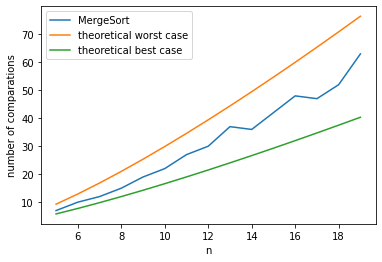

In [11]:
import random
import math
import matplotlib.pyplot as plt

def merge(a, b, t ):
  c = [] 
  while len(a) > 0 and len(b) > 0:
    t += 1                      #contador de comparaciones 
    if a[0] < b[0]:          
      c.append (a[0])
      a.pop(0)
    else: 
      c.append (b[0])
      b.pop(0)
   
  if len(a) == 0:  # agrego los elementos del arreglo que me queda al final de c
    c += b
  else: 
    c += a
  return c , t

def mergeSort(arr):
  if len(arr) < 2: return arr , 0
  else:
    mid = len(arr) // 2
    right, t1= mergeSort(arr[:mid])
    left, t2= mergeSort(arr[mid:])
    return merge(right, left, t1+t2)


x=[n for n in range(5,20)] 
y1=[(n-1)*math.log2(n)  for n in range(5,20)] # worst case
y2=[(n/2)*math.log2(n)  for n in range(5,20)] # best case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  a, counter = mergeSort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of comparations')
plt.show()


###Analisis de resultados
Podemos observar como el numero de comparaciones realizadas se comporta de forma lineal en funcion al tamaño del problema en tanto en peor como en el mejor caso teorico. A pesar de esto si observamos sus pendiente notaremos que el mejor caso en mas rapido.
El caso empírico se mueve entre el mejor y el peor caso teorico sin una tendencia definida.


### 5.2 Tiempo de ejecucion
####**Grafico compararativo MergeSort vs InsertionSort**
El siguiente gráfico muestra tiempo de ejecución del algoritmo **MergeSort **comparado al de el de **InsertionSort**, en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre  5 y 500 .



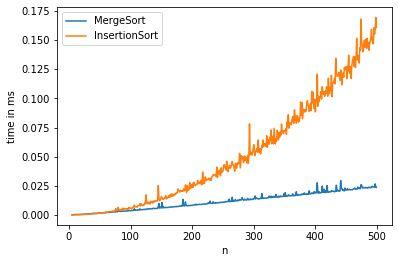

In [2]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def insertionSort(a, verbose=False):
  n = len(a)
  T = 0
  if verbose == True: print("Entrada del arreglo:",a)
  for i in range(1,n):
    actual = a[i]
    j = i
    # nos desplazamos por el arreglo hasta la posicion correcta para el elemento actual
    while j > 0  and a[j-1] > actual:
      a[j] = a[j-1]
      j-= 1
      T+=1 
    if j != 0 : T+=1
    a[j] = actual
  return a, T

def merge(a, b, t ):
  c = [] 
  while len(a) > 0 and len(b) > 0:
    t += 1                      #contador de comparaciones 
    if a[0] < b[0]:          
      c.append (a[0])
      a.pop(0)
    else: 
      c.append (b[0])
      b.pop(0)
   
  if len(a) == 0:  # agrego los elementos del arreglo que me queda al final de c
    c += b
  else: 
    c += a
  return c , t

def mergeSort(arr):
  if len(arr) < 2: return arr , 0
  else:
    mid = len(arr) // 2
    right, t1= mergeSort(arr[:mid])
    left, t2= mergeSort(arr[mid:])
    return merge(right, left, t1+t2)

x=[]; y=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["MergeSort","InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Analisis de resultados 
Si observamos los resultados obtenidos queda en evidencia la gran diferencia en el tiempo de ejecución de estos dos algoritmos, siendo MergeSort (conplejidad $O(n log(n)$) el mas rápido por mucho.